In [1]:
import sherpa 
parameters = [sherpa.Continuous(name='lr', range=[0.000001, 0.1], scale='log'),
              sherpa.Ordinal(name='Batch ', range=[16, 32, 64]),
              sherpa.Discrete(name='H_l1', range=[10, 300]),
              sherpa.Discrete(name='H_l2', range=[5, 150]),
              sherpa.Choice(name='activation', range=["nn.Hardswish",'nn.PReLU', 'nn.ReLU', 'nn.Sigmoid',"nn.LeakyReLU"])]
algorithm = sherpa.algorithms.RandomSearch(max_num_trials=150)
study = sherpa.Study(parameters=parameters,
                 algorithm=algorithm,
                 lower_is_better=False,
                 disable_dashboard=True)

In [2]:
import pandas as pd
import numpy as np

In [3]:
hold=pd.read_csv("results.csv")

In [4]:
hold.groupby(by="activate").mean()

,Trial-ID,Iteration,H_l1,H_l2,lr,Objective,training_error
activate,,,,,,,
nn.Hardswish,111.133333,4750.045455,154.666667,75.577778,0.007282,0.769460,0.763099
nn.LeakyReLU,76.555556,4750.045455,159.185185,78.148148,0.016857,-0.415915,-0.521023
nn.PReLU,89.191489,4750.045455,169.510638,75.127660,0.005818,0.843359,0.838686
nn.ReLU,96.371429,4750.045455,166.085714,77.857143,0.004751,0.870223,0.872513
nn.Sigmoid,118.847826,4750.045455,149.043478,84.847826,0.008050,0.625150,0.623101


In [5]:
done=hold[hold["Status"]!="INTERMEDIATE"]
done=done.drop("Status",axis=1)

In [6]:
done.groupby("activate").median()

,Trial-ID,Iteration,H_l1,H_l2,lr,Objective,training_error
activate,,,,,,,
nn.Hardswish,113.0,9500.0,167.0,87.0,0.000086,0.998927,0.998937
nn.LeakyReLU,59.0,9500.0,178.0,74.0,0.000383,0.999084,0.999181
nn.PReLU,81.0,9500.0,173.0,69.0,0.000042,0.999006,0.999038
nn.ReLU,87.0,9500.0,197.0,88.0,0.000082,0.999064,0.999146
nn.Sigmoid,123.5,9500.0,149.5,85.0,0.000105,0.996988,0.997098


In [7]:
done.sort_values(by="Objective",ascending=False)
holder=np.array(done["activate"].unique())
f=lambda x: np.argwhere(holder==x)[0][0]
done["activate"]=done["activate"].apply(f)
pc_fit=done[["H_l1","H_l2","activate","lr","Objective"]]

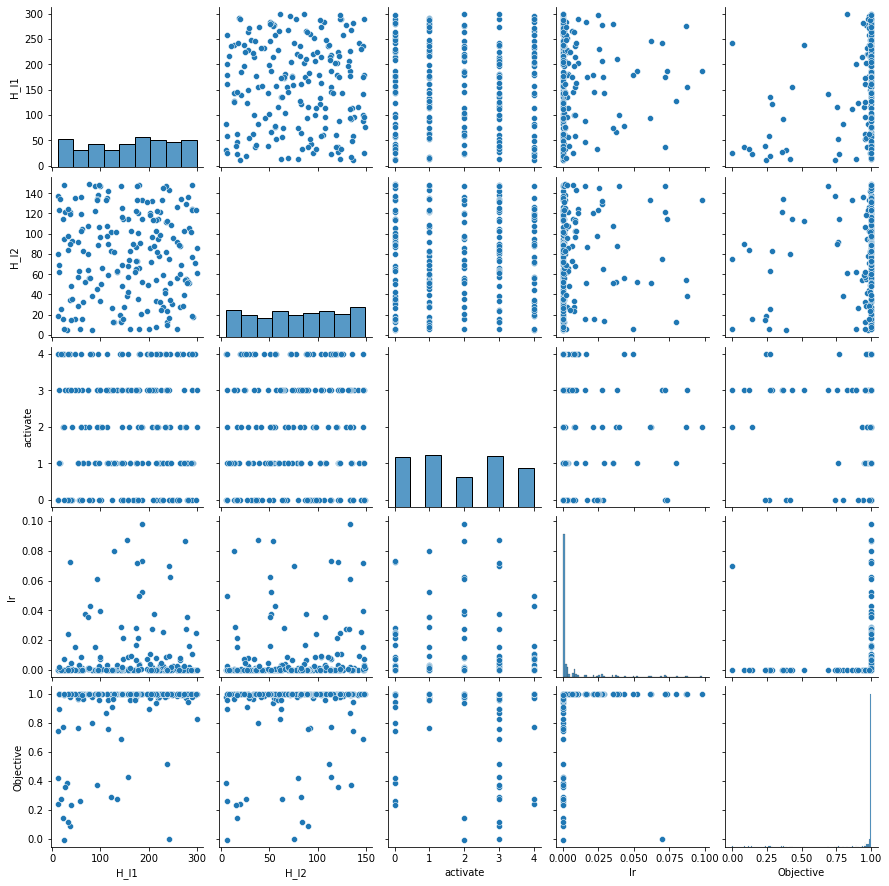

In [8]:
import seaborn as sns
sns.pairplot(pc_fit)

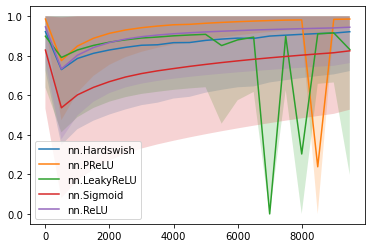

In [67]:
from Statistics_helper import time_series_with_error
compare="activate"
interest="Objective"
index="Iteration"
time_series_with_error(hold,compare,interest,index)

In [80]:
hold["Ratio"]=hold['H_l2']/hold['H_l1']

In [81]:
def cat_ratio(x):
    if x<.2:
        return "<.2"
    elif x<.4:
        return ".2-.4"
    elif x<.6:
        return ".4-.6"
    elif x<.8:
        return ".6-.8"
    else:
        return ">.8"
hold["Ratio"]=hold["Ratio"].apply(cat_ratio)

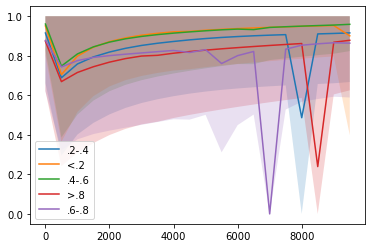

In [82]:
from Statistics_helper import time_series_with_error
compare="Ratio"
interest="Objective"
index="Iteration"
time_series_with_error(hold,compare,interest,index)